In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## grouped data and get the count of each 2-level group
titanic_data = pd.read_csv('titanic-data.csv')
t = titanic_data.groupby(['Pclass', 'Sex'])['Survived'].apply(len).reset_index()
t

,Pclass,Sex,Survived
0,1,female,94
1,1,male,122
2,2,female,76
3,2,male,108
4,3,female,144
5,3,male,347


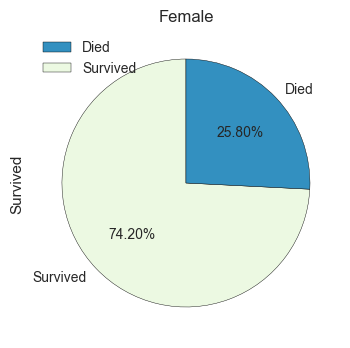

In [11]:
# turn the pieplot angel by set:  startangle = 90
# Not necessary to keep both label and legend
titanic_data[titanic_data.Sex == 'female']['Survived'].value_counts().plot(kind = 'pie',\
            title = 'Female', labels = ['Survived', 'Died'], colors = ['#ecf9e2','#3390c0'],\
            figsize=(4, 4),autopct='%.2f%%', fontsize=10, legend='reverse', startangle = 90)
plt.show()

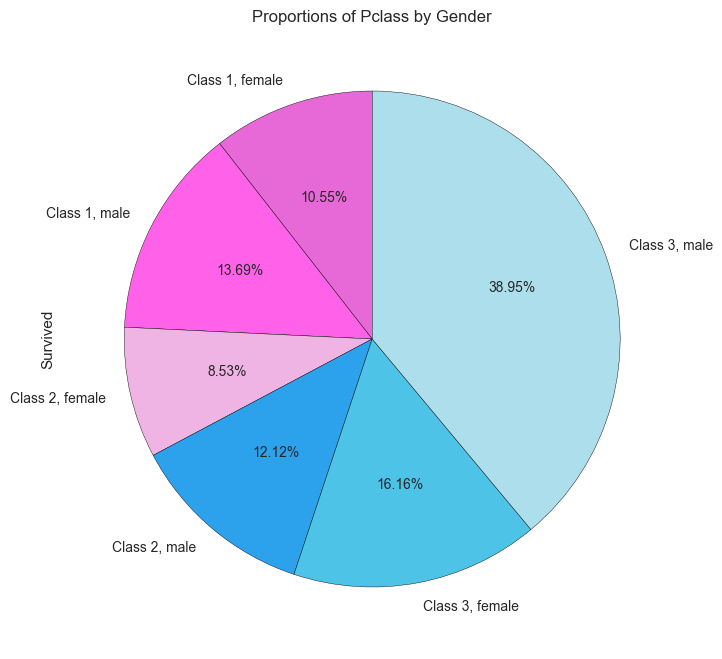

In [13]:
# Play with pie
data_by_class_sex = titanic_data.groupby(['Pclass','Sex'])['Survived'].apply(len).reset_index()
data_by_class_sex

labels = []

for i in range(len(data_by_class_sex)):
    labels.append('Class '+str(data_by_class_sex['Pclass'][i])+', '+data_by_class_sex['Sex'][i])



data_by_class_sex['Survived'].plot(kind = 'pie',\
            title = 'Proportions of Pclass by Gender', labels = labels, \
                       colors = ['#e769d7','#ff62e8','#efb3e4','#2ca2ec','#4dc3e8','#acdeec'],\
            figsize=(8, 8),autopct='%.2f%%', fontsize=10, startangle = 90)
plt.show()

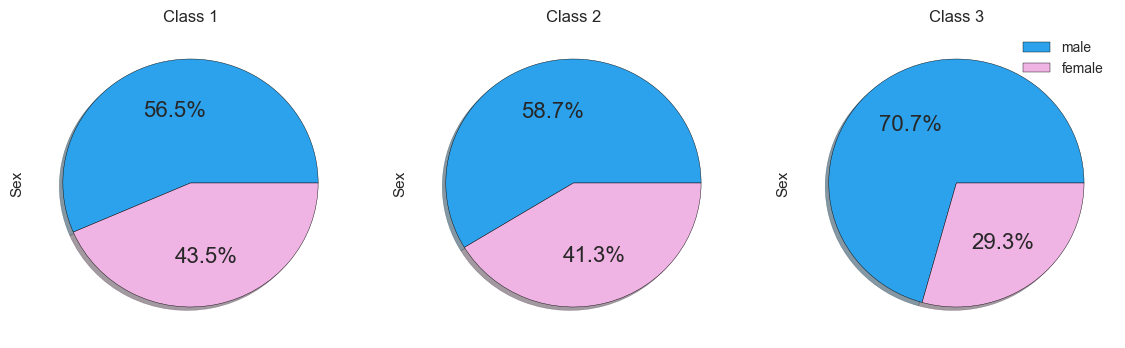

In [14]:
# Multiple pie charts:
data_class1 = titanic_data.loc[lambda df: df.Pclass == 1, :]
data_class2 = titanic_data.loc[lambda df: df.Pclass == 2, :]
data_class3 = titanic_data.loc[lambda df: df.Pclass == 3, :]

fig, axes = plt.subplots(nrows=1, ncols=3)
data_class1['Sex'].value_counts().plot(kind= 'pie', \
                                          title='Class 1', ax=axes[0], \
                                          figsize=(14, 4),autopct='%1.1f%%', \
                                          fontsize=16, shadow = True,\
                                          colors = ['#2ca2ec','#efb3e4'], labels=None)

data_class2['Sex'].value_counts().plot(kind= 'pie', \
                                          title='Class 2', ax=axes[1], \
                                          figsize=(14, 4),autopct='%1.1f%%', \
                                          fontsize=16, shadow = True,\
                                          colors = ['#2ca2ec','#efb3e4'], labels=None)
data_class3['Sex'].value_counts().plot(kind= 'pie', \
                                          title='Class 3', ax=axes[2], \
                                          figsize=(14, 4),autopct='%1.1f%%', \
                                          fontsize=16, shadow = True,\
                                          colors = ['#2ca2ec','#efb3e4'],\
                                          legend=True, labels=None)
plt.show()


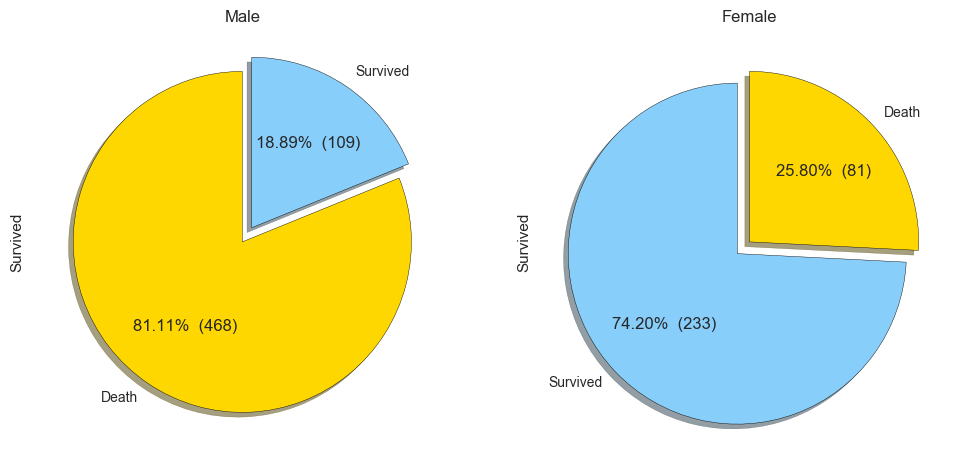

In [19]:
# Multiple pie charts 2
# This function allows us to include counts along with percentage
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(12)
colors = ['gold', 'lightskyblue']
df = titanic_data[titanic_data.Sex == 'male']['Survived'].value_counts()
df.plot(kind = 'pie', ax = axes[0], title ='Male', shadow = True,\
        colors = colors, labels = ['Death', 'Survived'], startangle = 90,\
        explode = (0.0, 0.1), autopct = make_autopct(df))
df = titanic_data[titanic_data.Sex == 'female']['Survived'].value_counts()
colors.reverse()
df.plot(kind = 'pie', ax = axes[1], title ='Female', shadow = True,\
        colors = colors, labels = ['Survived', 'Death'], startangle = 90,\
        explode = (0.1, 0.0), autopct = make_autopct(df))
plt.show()